In [1]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
news_set = pd.read_csv('newsfake.csv')
news_set

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [5]:
print(type(news_set))

<class 'pandas.core.frame.DataFrame'>


In [6]:
news_set.shape

(20800, 5)

In [7]:
news_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
news_set.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [9]:
news_set.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
news_set = news_set.fillna('')
news_set['Content'] = news_set['author'] + news_set['title']
news_set['Content']

0        Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1        Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...
2        Consortiumnews.comWhy the Truth Might Get You ...
3        Jessica Purkiss15 Civilians Killed In Single U...
4        Howard PortnoyIranian woman jailed for fiction...
                               ...                        
20795    Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796    Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...
20797    Michael J. de la Merced and Rachel AbramsMacy’...
20798    Alex AnsaryNATO, Russia To Hold Parallel Exerc...
20799               David SwansonWhat Keeps the F-35 Alive
Name: Content, Length: 20800, dtype: object

In [13]:
news_set.isnull().sum()

id         0
title      0
author     0
text       0
label      0
content    0
Content    0
dtype: int64

In [14]:
x = news_set.drop(['label'],axis = 1)
x

,id,title,author,text,content,Content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.comWhy the Truth Might Get You ...,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss15 Civilians Killed In Single U...,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard PortnoyIranian woman jailed for fiction...,Howard PortnoyIranian woman jailed for fiction...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Jerome HudsonRapper T.I.: Trump a ’Poster Chil...,Jerome HudsonRapper T.I.: Trump a ’Poster Chil...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,"Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat...","Benjamin HoffmanN.F.L. Playoffs: Schedule, Mat..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Michael J. de la Merced and Rachel AbramsMacy’...,Michael J. de la Merced and Rachel AbramsMacy’...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...","Alex AnsaryNATO, Russia To Hold Parallel Exerc...","Alex AnsaryNATO, Russia To Hold Parallel Exerc..."


In [15]:
y = news_set['label']
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [16]:
port_stem = PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]','',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ''.join(stemmed_content)
    return stemmed_content

In [18]:
news_set['content'] = news_set['content'].apply(stemming)
news_set['content']

0        darrelllucushousedemaidewedidntevenseecomeysle...
1        danieljflynnflynnhillaryclintonbigwomanoncampu...
2               consortiumnewscomwhythetruthmightgetyoufir
3        jessicapurkisscivilianskilledinsingleusairstri...
4        howardportnoyiranianwomanjailedforfictionalunp...
                               ...                        
20795    jeromehudsonrappertitrumpaposterchildforwhites...
20796    benjaminhoffmannflplayoffsschedulematchupsando...
20797    michaeljdelamercedandrachelabramsmacysissaidto...
20798    alexansarynatorussiatoholdparallelexercisesinb...
20799                          davidswansonwhatkeepsthefal
Name: content, Length: 20800, dtype: object

In [20]:
X = news_set['content'].values
X

array(['darrelllucushousedemaidewedidntevenseecomeysletteruntiljasonchaffetztweetedit',
       'danieljflynnflynnhillaryclintonbigwomanoncampusbreitbart',
       'consortiumnewscomwhythetruthmightgetyoufir', ...,
       'michaeljdelamercedandrachelabramsmacysissaidtoreceivetakeoverapproachbyhudsonsbaythenewyorktim',
       'alexansarynatorussiatoholdparallelexercisesinbalkan',
       'davidswansonwhatkeepsthefal'], dtype=object)

In [21]:
Y = news_set['label'].values
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [22]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,stratify = y,random_state=2)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
train_data_predict = model.predict(xtrain)
training_data_accuracy = accuracy_score(train_data_predict,ytrain)
training_data_accuracy

0.9985576923076923

In [28]:
test_data_predict = model.predict(xtest)
test_data_accuracy = accuracy_score(test_data_predict,ytest)
test_data_accuracy

0.5012019230769231

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
cm = confusion_matrix(test_data_predict,ytest)

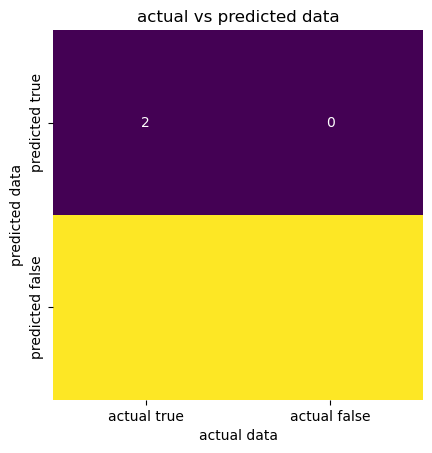

In [32]:
sns.heatmap(cm,cbar = False,square = True,annot = True,fmt = 'd',cmap = 'viridis',
           xticklabels = ['actual true','actual false'],
           yticklabels = ['predicted true','predicted false'])
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.title('actual vs predicted data')
plt.show()

In [35]:
print(classification_report(test_data_predict,ytest))


              precision    recall  f1-score   support

           0       0.00      1.00      0.00         2
           1       1.00      0.50      0.67      4158

    accuracy                           0.50      4160
   macro avg       0.50      0.75      0.33      4160
weighted avg       1.00      0.50      0.67      4160

